# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
#Biblioteca.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import patsy 
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline 

In [2]:
tips_data = sns.load_dataset("tips")
tips_data['tip_pct'] = tips_data['tip']/(tips_data['total_bill'] - tips_data['tip'])
tips_data['net_bill'] = tips_data['total_bill'] - tips_data['tip']
tips = tips_data[tips_data['tip_pct']<0.5].copy()
tips.reset_index()
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
#### 1.criando matriz de design
y, X = patsy.dmatrices('tip ~  net_bill', tips)


In [4]:
### 2.Remover variáveis não siginificativas
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 09 May 2022   Prob (F-statistic):           2.41e-25
Time:                        15:08:31   Log-Likelihood:                -366.31
No. Observations:                 242   AIC:                             736.6
Df Residuals:                     240   BIC:                             743.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2219      0.166      7.339      0.000       0.894       1.550
net_bill       0.1044      0.009     11.708      0.000       0.087       0.122
==============================================================================
Omnibus:                       27.459   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.674
Skew:                           0.610   Prob(JB):                     9.92e-12
Kurtosis:                       4.881   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Eliminando variáveis do modelo - Resultados

1)primeiro passo com todas as variáveis obtive um R2=0.369. Como sex tem um p-value alto de 0,997 vou removê-lo do modelo.
2)Segundo passo com sex eliminado obtive um R2=0.369. Como time tem um p-value alto de 0,961 também vou removê-lo do modelo.
3)Terceiro passo com time eliminado obtive um R2=0.369. Como smoker tem um p-value alto de 0,147 também vou removê-lo do modelo.
4)Quarto passo com smoker eliminado obtive um R2=0.364. 

Conclusão: com as eliminações das variáveis,  simplificamos o modelo e não tivemos uma perda considerável do nível de explicação do modelo. O R2 caiu de 0.369 para 0.364.


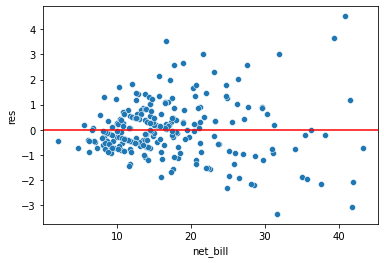

In [5]:
# 3. observe o gráfico de resíduos em função de net_bill
tips['res']= modelo.resid
sns.scatterplot(x='net_bill', y='res',data=tips)
plt.axhline(y=0, color = 'r')

##### O gráfico mostra uma tendência de funil, acredito que pode ser melhorado.

In [6]:
#  4.teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.
#transformando net_bill em log
y, X = patsy.dmatrices('tip ~  np.log(net_bill)', tips)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     139.4
Date:                Mon, 09 May 2022   Prob (F-statistic):           1.13e-25
Time:                        15:08:32   Log-Likelihood:                -365.56
No. Observations:                 242   AIC:                             735.1
Df Residuals:                     240   BIC:                             742.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.9851      0.427     -4.651      0.000      -2.826      -1.144
np.log(net_bill)     1.8248      0.155     11.808      0.000       1.520       2.129
==============================================================================
Omnibus:                       46.523   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.909
Skew:                           0.881   Prob(JB):                     3.04e-25
Kurtosis:                       5.844   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

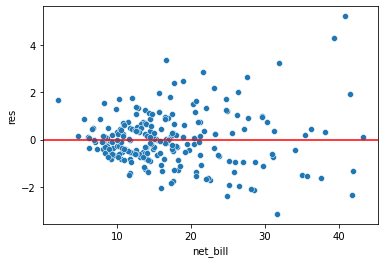

In [7]:
tips['res']= modelo.resid
sns.scatterplot(x='net_bill', y='res',data=tips)
plt.axhline(y=0, color = 'r')

In [8]:
#transformando net_bill em polinômio 
y, X = patsy.dmatrices('tip ~  np.power(net_bill,2)', tips)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     111.2
Date:                Mon, 09 May 2022   Prob (F-statistic):           1.30e-21
Time:                        15:08:32   Log-Likelihood:                -374.91
No. Observations:                 242   AIC:                             753.8
Df Residuals:                     240   BIC:                             760.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2202      0.103     21.494      0.000       2.017       2.424
np.power(net_bill, 2)     0.0022      0.000     10.546      0.000       0.002       0.003
==============================================================================
Omnibus:                       21.866   Durbin-Watson:                   2.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.936
Skew:                           0.579   Prob(JB):                     1.16e-07
Kurtosis:                       4.351   Cond. No.                         698.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

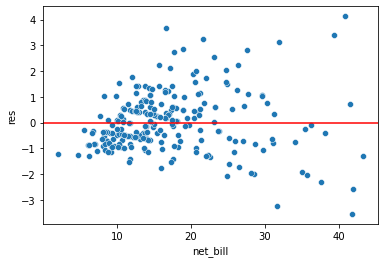

In [9]:
tips['res']= modelo.resid
sns.scatterplot(x='net_bill', y='res',data=tips)
plt.axhline(y=0, color = 'r')

##### Conclusão: escolho o modelo onde transformamos o net_bill em log. Com este modelo obtivemos um melhor R2.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [10]:
#1 . Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de tip, 
#explicado por sex, smoker, #diner e net_bill 
y, X = patsy.dmatrices('np.log(tip) ~  net_bill', tips)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     123.8
Date:                Mon, 09 May 2022   Prob (F-statistic):           1.82e-23
Time:                        15:08:32   Log-Likelihood:                -91.279
No. Observations:                 242   AIC:                             186.6
Df Residuals:                     240   BIC:                             193.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4604      0.053      8.617      0.000       0.355       0.566
net_bill       0.0318      0.003     11.128      0.000       0.026       0.037
==============================================================================
Omnibus:                        5.775   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                5.480
Skew:                          -0.354   Prob(JB):                       0.0646
Kurtosis:                       3.204   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 2.Remova as variáveis não significantes.
1)primeiro passo com todas as variáveis obtive um R2=0.346. Como sex tem um p-value alto de 0,923 vou removê-lo do modelo.
2)Segundo passo com sex eliminado obtive um R2=0.346. Como time tem um p-value alto de 0,967 também vou removê-lo do modelo.
3)Terceiro passo com time eliminado obtive um R2=0.346. Como smoker tem um p-value alto de 0,159 também vou removê-lo do modelo.
4)Quarto passo com smoker eliminado obtive um R2=0.340. 

Conclusão: com as eliminações das variáveis,  simplificamos o modelo e não tivemos uma perda considerável do nível de explicação do modelo. O R2 caiu de 0.346 para 0.340.

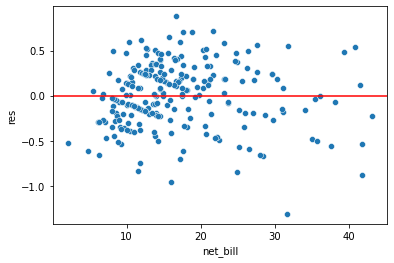

In [11]:
#3.Observe o gráfico de resíduos em função de net_bill
tips['res']= modelo.resid
sns.scatterplot(x='net_bill', y='res',data=tips)
plt.axhline(y=0, color = 'r')

In [12]:
#4.Teste transformar net_bill no log e um polinômio. Escolha o melhor modelo.
#net_bill no log
y, X = patsy.dmatrices('np.log(tip) ~  np.log(net_bill)', tips)
modelo = sm.OLS(y,X).fit()
modelo.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     157.4
Date:                Mon, 09 May 2022   Prob (F-statistic):           4.20e-28
Time:                        15:08:32   Log-Likelihood:                -80.588
No. Observations:                 242   AIC:                             165.2
Df Residuals:                     240   BIC:                             172.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.6285      0.131     -4.780      0.000      -0.887      -0.370
np.log(net_bill)     0.5973      0.048     12.547      0.000       0.504       0.691
==============================================================================
Omnibus:                        8.926   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.019
Skew:                          -0.406   Prob(JB):                       0.0110
Kurtosis:                       3.485   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

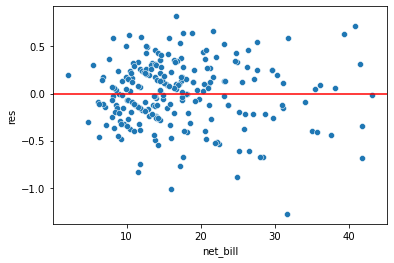

In [13]:
#Gráfico do residuo
tips['res']= modelo.resid
sns.scatterplot(x='net_bill', y='res',data=tips)
plt.axhline(y=0, color = 'r')

In [14]:
#Calculo do R2
tips['pred_y']= np.exp(modelo.fittedvalues)
r2 = tips[['pred_y','tip']].corr().iloc[0,1]**2
r2

0.3737120165491038

In [15]:
#net_bill no polinômio
y, X = patsy.dmatrices('np.log(tip) ~  np.power(net_bill,2)', tips)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     86.19
Date:                Mon, 09 May 2022   Prob (F-statistic):           1.01e-17
Time:                        15:08:32   Log-Likelihood:                -104.49
No. Observations:                 242   AIC:                             213.0
Df Residuals:                     240   BIC:                             220.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7780      0.034     23.025      0.000       0.711       0.845
np.power(net_bill, 2)     0.0006    6.8e-05      9.284      0.000       0.000       0.001
==============================================================================
Omnibus:                        3.195   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                3.202
Skew:                          -0.278   Prob(JB):                        0.202
Kurtosis:                       2.905   Cond. No.                         698.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

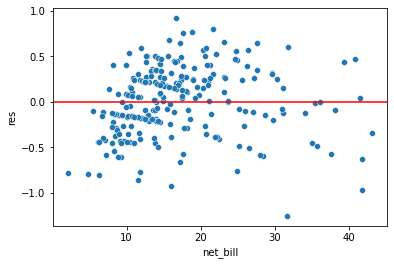

In [16]:
#Gráfico do residuo
tips['res']= modelo.resid
sns.scatterplot(x='net_bill', y='res',data=tips)
plt.axhline(y=0, color = 'r')

##### Conclusão: escolho o modelo onde transformamos o net_bill em log. Com este modelo obtivemos um melhor R2 e o gráfico de residuo apresentou uma maior proximidade dos pontos (res/erros) da linha do zero.

In [17]:
#5. Do modelo final deste item, calcule o  𝑅2  na escala de tip (sem o log). 
#Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?
#Calcular o R2
tips['pred_y']= np.exp(modelo.fittedvalues)
r2 = tips[['pred_y','tip']].corr().iloc[0,1]**2
r2



0.27828921701825776

##### Conclusão: o melhor modelo é o que tem net_bill em log, pois atingimos um R2 de 0,373 contra um R2 de 0,278 quando temos net_bill no polinômio.

In [18]:
#5.Do modelo final deste item, calcule o  𝑅2  na escala de tip (sem o log). Compare com o modelo
#do item 1. Qual tem melhor coeficiente de determinação?

##### O modelo do item 1 tem um melhor coeficiente de determinação em comparação ao modelo final deste item. O R2 do modelo final do item 1 atingiu 0,367 contra um R2 do modelo final deste item de 0,278.


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [19]:
#Carregando arquivo
prev_rendas = pd.read_csv('previsao_de_renda.csv')
prev_rendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [20]:
#Como tempo de emprego tem informações não preenchidas vamos dropar os registros 
prev_rendas = prev_rendas.dropna()
prev_rendas.drop(columns=['Unnamed: 0','data_ref','index'], inplace=True)
prev_rendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12466 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   12466 non-null  object 
 1   posse_de_veiculo       12466 non-null  bool   
 2   posse_de_imovel        12466 non-null  bool   
 3   qtd_filhos             12466 non-null  int64  
 4   tipo_renda             12466 non-null  object 
 5   educacao               12466 non-null  object 
 6   estado_civil           12466 non-null  object 
 7   tipo_residencia        12466 non-null  object 
 8   idade                  12466 non-null  int64  
 9   tempo_emprego          12466 non-null  float64
 10  qt_pessoas_residencia  12466 non-null  float64
 11  mau                    12466 non-null  bool   
 12  renda                  12466 non-null  float64
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 1.1+ MB


In [21]:
prev_rendas


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

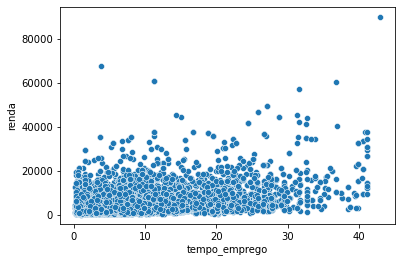

In [22]:
sns.scatterplot(x='tempo_emprego', y= 'renda', data=prev_rendas)

In [23]:
#eliminando outliers pelo método dos Quartis
print(prev_rendas.shape)
q1=prev_rendas['renda'].quantile(0.25)
q3=prev_rendas['renda'].quantile(0.75)
iqr = q3-q1
lim_inf= q1 - (iqr * 1.5)
lim_sup= q1 + (iqr * 1.5)
#prev_rendas = prev_rendas[(prev_rendas['renda'] > lim_inf) & (prev_rendas['renda'] < lim_sup)]
prev_rendas.reset_index(inplace=True)
print(prev_rendas.shape)


(12466, 13)
(12466, 14)


In [24]:
prev_renda = prev_rendas.copy()

### 1.Ajuste um modelo de regressão linear simples para explicar renda como variável resposta,  por tempo_emprego como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.

In [25]:
#Regressão.
y, X = patsy.dmatrices('renda ~  tempo_emprego', prev_renda)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        15:08:33   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2.Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?

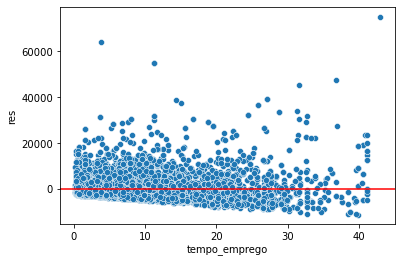

In [26]:
#Gráfico do residuo
prev_renda['res']= modelo.resid
sns.scatterplot(x='tempo_emprego', y='res',data=prev_renda)
plt.axhline(y=0, color = 'r')

In [27]:
#Melhorando a Regressão 1
y, X = patsy.dmatrices('renda ~  np.log(tempo_emprego)', prev_renda)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1123.
Date:                Mon, 09 May 2022   Prob (F-statistic):          7.66e-236
Time:                        15:08:33   Log-Likelihood:            -1.2301e+05
No. Observations:               12466   AIC:                         2.460e+05
Df Residuals:                   12464   BIC:                         2.460e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2612.1692     78.783     33.156      0.000    2457.742    2766.597
np.log(tempo_emprego)  1372.2043     40.946     33.513      0.000    1291.945    1452.464
==============================================================================
Omnibus:                    10410.764   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           437896.454
Skew:                           3.782   Prob(JB):                         0.00
Kurtosis:                      31.033   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

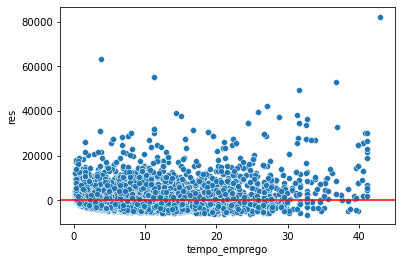

In [28]:
#Gráfico do residuo
prev_renda['res']= modelo.resid
sns.scatterplot(x='tempo_emprego', y='res',data=prev_renda)
plt.axhline(y=0, color = 'r')

In [29]:
#Melhorando a Regressão 2
y, X = patsy.dmatrices('np.log(renda) ~  np.log(tempo_emprego)', prev_renda)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1394.
Date:                Mon, 09 May 2022   Prob (F-statistic):          2.85e-289
Time:                        15:08:33   Log-Likelihood:                -14269.
No. Observations:               12466   AIC:                         2.854e+04
Df Residuals:                   12464   BIC:                         2.856e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.7492      0.013    603.989      0.000       7.724       7.774
np.log(tempo_emprego)     0.2489      0.007     37.333      0.000       0.236       0.262
==============================================================================
Omnibus:                        9.367   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.357
Skew:                           0.062   Prob(JB):                      0.00929
Kurtosis:                       3.049   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

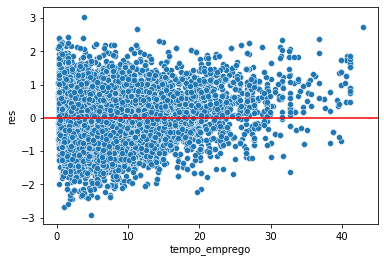

In [30]:
#Gráfico do residuo
prev_renda['res']= modelo.resid
sns.scatterplot(x='tempo_emprego', y='res',data=prev_renda)
plt.axhline(y=0, color = 'r')

In [31]:
#R2
#Calcular o R2
prev_renda['pred_y']= np.exp(modelo.fittedvalues)
r2 = prev_renda[['pred_y','renda']].corr().iloc[0,1]**2
r2

0.10548785849371352

In [32]:
#Melhorando a Regressão 3
y, X = patsy.dmatrices('np.log(renda) ~  tempo_emprego', prev_renda)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2098.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        15:08:34   Log-Likelihood:                -13960.
No. Observations:               12466   AIC:                         2.792e+04
Df Residuals:                   12464   BIC:                         2.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8074      0.010    774.002      0.000       7.788       7.827
tempo_emprego     0.0449      0.001     45.802      0.000       0.043       0.047
==============================================================================
Omnibus:                        3.082   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                3.050
Skew:                           0.034   Prob(JB):                        0.218
Kurtosis:                       3.037   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

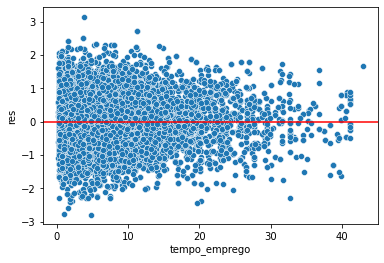

In [33]:
#Gráfico do residuo
prev_renda['res']= modelo.resid
sns.scatterplot(x='tempo_emprego', y='res',data=prev_renda)
plt.axhline(y=0, color = 'r')

In [34]:
#R2
#Calcular o R2
prev_renda['pred_y']= np.exp(modelo.fittedvalues)
r2 = prev_renda[['pred_y','renda']].corr().iloc[0,1]**2
r2

0.1682885520673369

In [35]:
#Melhorando a Regressão 4
y, X = patsy.dmatrices('np.log(renda) ~  np.power(tempo_emprego,2)', prev_renda)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     1761.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        15:08:34   Log-Likelihood:                -14106.
No. Observations:               12466   AIC:                         2.822e+04
Df Residuals:                   12464   BIC:                         2.823e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      8.0046      0.008   1050.676      0.000       7.990       8.019
np.power(tempo_emprego, 2)     0.0014   3.39e-05     41.959      0.000       0.001       0.001
==============================================================================
Omnibus:                        1.996   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.369   Jarque-Bera (JB):                1.974
Skew:                           0.020   Prob(JB):                        0.373
Kurtosis:                       3.047   Cond. No.                         255.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

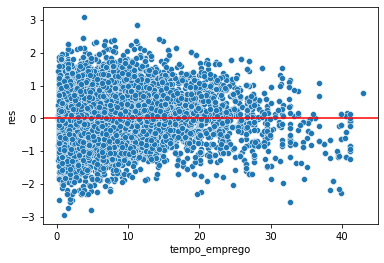

In [36]:
#Gráfico do residuo
prev_renda['res']= modelo.resid
sns.scatterplot(x='tempo_emprego', y='res',data=prev_renda)
plt.axhline(y=0, color = 'r')

In [37]:
#R2
#Calcular o R2
prev_renda['pred_y']= np.exp(modelo.fittedvalues)
r2 = prev_renda[['pred_y','renda']].corr().iloc[0,1]**2
r2

0.1356454363551738

Conclusões: Fiz um exemplo eliminando os outliers, com isto não consegui melhorar o modelo usando as técnicas ensinadas, pois obtive os seguintes resultados. Regressão --> Original: 0.065 / 1) 0.051 /2) 0.055 / 3) 0.061 e 4) 0.040. 
Resolvi então manter os outliers conforme mostrado acima e com eles consegui uma pequena melhora segue resultados obtidos: Regressão Original: 0.155 / 1) 0.083 / 2) 0.105 / 3) 0.168 / 4) 0.135. Ou seja, no modelo 3 obtive uma melhora mesmo que o gráfico de residuos continuou mostrando uma tendência.
Fiquei na dúvida: Na vida real o que seria melhor? Manter os outliers ou removê-los e tentar outros métodos?

### 3. Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis.

In [38]:
prev_renda.columns

Index(['index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'mau', 'renda', 'res',
       'pred_y'],
      dtype='object')

In [39]:
#Regressão
y, X = patsy.dmatrices('renda ~  sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + mau', prev_renda)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     141.0
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        15:08:34   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12440   BIC:                         2.442e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -275.6142   1675.894     -0.164      0.869   -3560.625    3009.396
sexo[T.M]                         2366.3093     88.116     26.855      0.000    2193.589    2539.030
posse_de_veiculo[T.True]           -79.2699     84.733     -0.936      0.350    -245.360      86.820
posse_de_imovel[T.True]            348.8880     83.443      4.181      0.000     185.326     512.450
tipo_renda[T.Bolsista]            -817.8078   2155.414     -0.379      0.704   -5042.752    3407.136
tipo_renda[T.Empresário]          1021.9829     90.151     11.336      0.000     845.273    1198.693
tipo_renda[T.Pensionista]         1744.5042   1458.879      1.196      0.232   -1115.124    4604.132
tipo_renda[T.Servidor público]     436.9302    130.517      3.348      0.001     181.097     692.764
educacao[T.Pós graduação]         2207.1796   1081.116      2.042      0.041      88.024    4326.335
educacao[T.Secundário]            -241.1182    437.804     -0.551      0.582   -1099.283     617.046
educacao[T.Superior completo]      338.3998    439.643      0.770      0.441    -523.369    1200.168
educacao[T.Superior incompleto]   -295.7849    471.028     -0.628      0.530   -1219.073     627.503
estado_civil[T.Separado]           144.4038    806.980      0.179      0.858   -1437.401    1726.209
estado_civil[T.Solteiro]           378.8127    792.270      0.478      0.633   -1174.159    1931.784
estado_civil[T.União]              -40.8760    143.778     -0.284      0.776    -322.703     240.951
estado_civil[T.Viúvo]              -38.3778    828.797     -0.046      0.963   -1662.949    1586.193
tipo_residencia[T.Casa]           -356.3831    328.636     -1.084      0.278   -1000.561     287.795
tipo_residencia[T.Com os pais]    -641.1830    368.536     -1.740      0.082   -1363.571      81.204
tipo_residencia[T.Comunitário]    -577.9834    634.095     -0.912      0.362   -1820.907     664.940
tipo_residencia[T.Estúdio]        -976.1533    547.375     -1.783      0.075   -2049.093      96.786
tipo_residencia[T.Governamental]  -883.4601    397.305     -2.224      0.026   -1662.240    -104.680
mau[T.True]                        -19.3616    255.885     -0.076      0.940    -520.935     482.212
qtd_filhos                        -242.7458    790.085     -0.307      0.759   -1791.435    1305.943
idade                               29.8762      4.808      6.213      0.000      20.451      39.301
tempo_emprego                      299.3139      6.146     48.700      0.000     287.267     311.361
qt_pessoas_residencia              308.7311    788.615      0.391      0.695   -1237.077    1854.539
==============================================================================
Omnibus:                    10075.338   Durbin-Watson:                   2.

In [40]:
#Melhorando Regressão
y, X = patsy.dmatrices('np.log(renda) ~  sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + mau', prev_renda)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     158.7
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        15:08:35   Log-Likelihood:                -13204.
No. Observations:               12466   AIC:                         2.646e+04
Df Residuals:                   12440   BIC:                         2.665e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.2007      0.272     26.484      0.000       6.668       7.734
sexo[T.M]                            0.4815      0.014     33.681      0.000       0.453       0.510
posse_de_veiculo[T.True]            -0.0014      0.014     -0.104      0.917      -0.028       0.026
posse_de_imovel[T.True]              0.0847      0.014      6.260      0.000       0.058       0.111
tipo_renda[T.Bolsista]              -0.0499      0.350     -0.143      0.887      -0.735       0.636
tipo_renda[T.Empresário]             0.1787      0.015     12.217      0.000       0.150       0.207
tipo_renda[T.Pensionista]            0.4099      0.237      1.732      0.083      -0.054       0.874
tipo_renda[T.Servidor público]       0.0949      0.021      4.482      0.000       0.053       0.136
educacao[T.Pós graduação]            0.5496      0.175      3.133      0.002       0.206       0.893
educacao[T.Secundário]               0.0166      0.071      0.233      0.816      -0.123       0.156
educacao[T.Superior completo]        0.1134      0.071      1.590      0.112      -0.026       0.253
educacao[T.Superior incompleto]     -0.0090      0.076     -0.117      0.907      -0.159       0.141
estado_civil[T.Separado]            -0.0395      0.131     -0.302      0.763      -0.296       0.217
estado_civil[T.Solteiro]             0.0213      0.129      0.166      0.868      -0.231       0.273
estado_civil[T.União]               -0.0256      0.023     -1.098      0.272      -0.071       0.020
estado_civil[T.Viúvo]               -0.0377      0.134     -0.280      0.779      -0.301       0.226
tipo_residencia[T.Casa]              0.0146      0.053      0.274      0.784      -0.090       0.119
tipo_residencia[T.Com os pais]      -0.0578      0.060     -0.967      0.334      -0.175       0.059
tipo_residencia[T.Comunitário]       0.0571      0.103      0.555      0.579      -0.145       0.259
tipo_residencia[T.Estúdio]          -0.1093      0.089     -1.231      0.218      -0.283       0.065
tipo_residencia[T.Governamental]    -0.0567      0.064     -0.880      0.379      -0.183       0.070
mau[T.True]                         -0.0323      0.042     -0.778      0.437      -0.114       0.049
qtd_filhos                           0.0047      0.128      0.037      0.971      -0.247       0.256
idade                                0.0052      0.001      6.628      0.000       0.004       0.007
tempo_emprego                        0.0482      0.001     48.349      0.000       0.046       0.050
qt_pessoas_residencia                0.0114      0.128      0.089      0.929      -0.239       0.262
==============================================================================
Omnibus:                        1.207   Durbin-Watson:                   2.

In [41]:
#R2
#Calcular o R2
prev_renda['pred_y']= np.exp(modelo.fittedvalues)
r2 = prev_renda[['pred_y','renda']].corr().iloc[0,1]**2
r2

0.24349710722441184

### 4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros

In [50]:
#Regressão removendo variávies menos significantes
y, X = patsy.dmatrices('np.log(renda) ~ sexo +  posse_de_imovel + tipo_renda + idade + tempo_emprego ', prev_renda)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     481.8
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        15:09:01   Log-Likelihood:                -13249.
No. Observations:               12466   AIC:                         2.652e+04
Df Residuals:                   12457   BIC:                         2.658e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          7.2988      0.031    238.636      0.000       7.239       7.359
sexo[T.M]                          0.4819      0.013     36.182      0.000       0.456       0.508
posse_de_imovel[T.True]            0.1009      0.013      7.625      0.000       0.075       0.127
tipo_renda[T.Bolsista]             0.0213      0.351      0.061      0.951      -0.666       0.708
tipo_renda[T.Empresário]           0.1866      0.015     12.806      0.000       0.158       0.215
tipo_renda[T.Pensionista]          0.4337      0.234      1.856      0.063      -0.024       0.892
tipo_renda[T.Servidor público]     0.1082      0.021      5.133      0.000       0.067       0.149
idade                              0.0045      0.001      6.239      0.000       0.003       0.006
tempo_emprego                      0.0484      0.001     48.558      0.000       0.046       0.050
==============================================================================
Omnibus:                        0.874   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.845
Skew:                          -0.004   Prob(JB):                        0.656
Kurtosis:                       3.039   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
#R2
#Calcular o R2
prev_renda['pred_y']= np.exp(modelo.fittedvalues)
r2 = prev_renda[['pred_y','renda']].corr().iloc[0,1]**2
r2

0.2387277033590073

Análise: Utilizando log de renda e todas as  variáveis para explicar o resultado chegamos a um R2 de 0.243. Simplificando o modelo temos uma perda mas chegamos a um resultado muito parecido de um R2 de 0.238.

### 5.Faça uma análise de resíduos. Avalie a qualidade do ajuste.

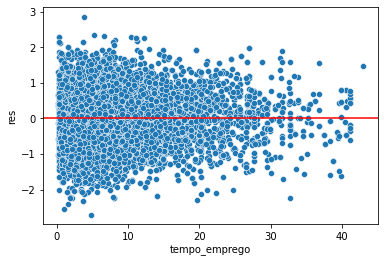

In [52]:
#avaliando redisuos 
prev_renda['res']=modelo.resid
sns.scatterplot(x='tempo_emprego', y='res', data=prev_renda)
plt.axhline(y=0, color='r')


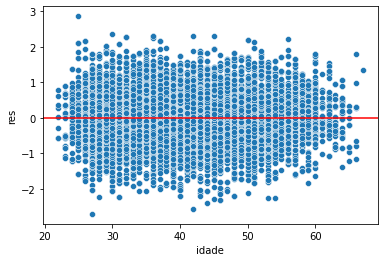

In [53]:
sns.scatterplot(x='idade', y='res', data=prev_renda)
plt.axhline(y=0, color='r')

<AxesSubplot:xlabel='sexo', ylabel='res'>

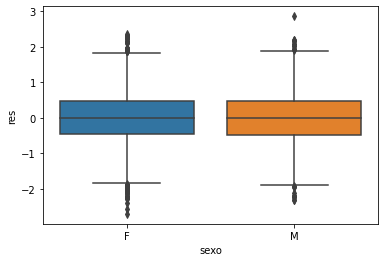

In [54]:
sns.boxplot(x='sexo', y='res', data=prev_renda)


<AxesSubplot:xlabel='posse_de_imovel', ylabel='res'>

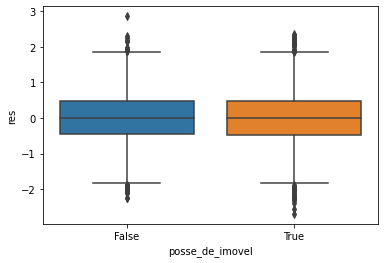

In [55]:
sns.boxplot(x='posse_de_imovel', y='res', data=prev_renda)

<AxesSubplot:xlabel='tipo_renda', ylabel='res'>

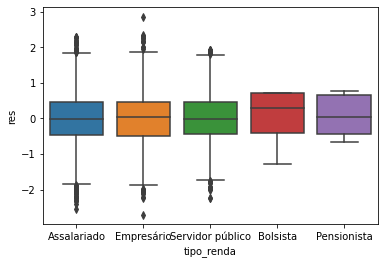

In [56]:
sns.boxplot(x='tipo_renda', y='res', data=prev_renda)

Análise: Analisando o resíduo do tempo de emprego mesmo depois de trabalhado ainda vemos um padrão. Quanto mais tempo de emprego o residuo diminui, ou seja existe menos variação. Para o caso de idade, também percebemos um padrão, o residuo é menor nas pontas, ou seja, com menos idade e com mais idade. O desejado seria não encontrar nenhum padrão evidente, com um aspecto de independência e variância uniforme.

### Análise dos valores preditos em relação ao tempo de empresa

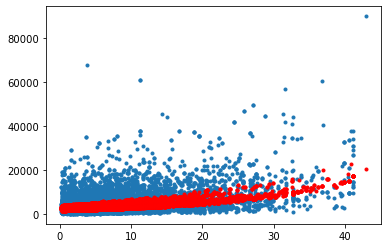

In [58]:
plt.plot(prev_renda['tempo_emprego'],prev_renda['renda'],'.')
plt.plot(prev_renda['tempo_emprego'],prev_renda['pred_y'],'r.')


Acredito que existe muito espaço para melhorar, com  um pouco mais de experiência e novas técnicas podemos buscar um resultado melhor. 